## Question 5

1) Add import statements. 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from pathlib import Path

# Small style adjustments for more readable plots
plt.style.use("seaborn-whitegrid")
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams["font.size"] = 14

In [12]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import fsspec

import xarray as xr
xr.set_options(display_style="html")  # display dataset nicely

import warnings
warnings.simplefilter("ignore")  # filter some warning messages

# code features from https://scitools.org.uk/cartopy/docs/v0.14/matplotlib/feature_interface.html
crs = ccrs.PlateCarree()  # set projection

In [13]:
ds = xr.open_dataset("~/shared/climate-data/ds_hw.nc")
ds

<xarray.Dataset>
Dimensions:           (time: 6443, lat: 251, lon: 234)
Coordinates:
  * lat               (lat) float32 33.0 33.06 33.12 33.18 ... 47.88 47.94 48.0
  * lon               (lon) float32 -132.0 -131.9 -131.9 ... -118.1 -118.0
  * time              (time) datetime64[ns] 2002-06-01T09:00:00 ... 2020-01-2...
Data variables:
    analysed_sst      (time, lat, lon) float32 ...
    analysis_error    (time, lat, lon) float32 ...
    mask              (time, lat, lon) float32 ...
    sea_ice_fraction  (time, lat, lon) float32 ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

2) Subset the dataset to only look at sea surface temperature.

In [14]:
# only the sea surface temperature 
only_sst = ds["analysed_sst"]

In [15]:

#subset the 2002 - 2012 data, find the average temp of each day. 

relative_climatology = only_sst.sel(time = slice('2002', '2012')).groupby('time.dayofyear').mean()

#subset the 2012 - 2016 data, find the average temp of each day. 
subset_climatology = only_sst.sel(time = slice('2012','2016')).groupby('time.dayofyear')


3. Subtract the average climatology by the day to day climatology, find the month of the maximum anomaly. 

In [16]:
# subtract the two data sets and find the max difference 
max_subset = (subset_climatology - relative_climatology).idxmax('time').dt.month


4. Plot 

Text(0.5, 0, ' ')

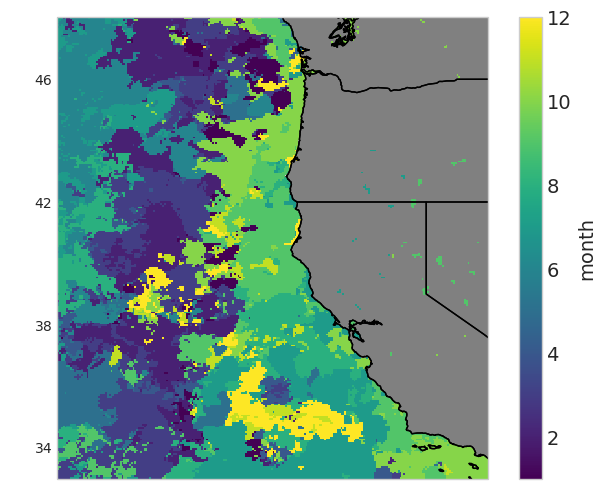

In [22]:
#Plot 
fig = plt.figure()
ax = plt.subplot(projection=crs)
max_subset.plot(ax=ax, transform = crs)


ax.coastlines("10m", color="k")
ax.add_feature(cfeature.LAND, color="grey")
ax.add_feature(cfeature.STATES.with_scale("10m"))


ax.set_yticks([34, 38, 42, 46])
ax.set_yticklabels([34, 38, 42, 46], fontsize=10)
ax.set_ylabel(" ")
ax.set_xticklabels(["138W", "130W", "122W"], fontsize=10)
ax.set_xlabel(" ")
    

5. Add the x-axis, y-axis, and move the months key to be horizontal under the plot. 